<img src="header.png" align="left"/>

# Exercise Analysis and quality control of data (10 points) 

The goal of this exercise is to get an overview of typical basic data analysis steps.

- Datatypes and shapes of data
- Prints of data
- Missing values
- Basic statistics
- Outliers
- Correlations between features


Code and background taken from:

- [https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
- [https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
- [https://github.com/Viveckh/HiPlotTutorial/blob/master/Hiplot-Tutorial.ipynb](https://github.com/Viveckh/HiPlotTutorial/blob/master/Hiplot-Tutorial.ipynb)

# Import of python modules

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import hiplot as hip

from scipy import stats
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN

from keras.datasets import mnist
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
#
# Turn of some warnings
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

#
# Einstellen der Grösse von Diagrammen
#
plt.rcParams['figure.figsize'] = [16, 9]

# Datatypes and shapes of data

https://numpy.org/devdocs/user/basics.types.html

<img src="info.png" align="left"/> 

In [5]:
# 
# Load some data
# 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv('data/iris/iris_mutilated.csv', names=names)

In [6]:
#
# Print shape of data
#
print(iris.shape)

(153, 5)


In [7]:
#
# Task: interpret those numbers in a short statement. (1 points)
# Hint: write your interpretation into your notebook in a MARKDOWN field.
# Meine Antwort

## Meine Antwort

Text

In [8]:
#
# Print datatypes
#
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  153 non-null    float64
 1   sepal-width   153 non-null    float64
 2   petal-length  152 non-null    float64
 3   petal-width   151 non-null    float64
 4   class         153 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB
None


# Print data

In [9]:
#
# Print head samples to see some data
#
print(iris.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.0          0.2  Iris-setosa
1            4.9          3.0           NaN          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [10]:
#
# Task: describe what a NaN is (1 points)
#

In [11]:
print(iris.tail())

     sepal-length  sepal-width  petal-length  petal-width           class
148           6.7          3.0           5.2          2.3  Iris-virginica
149           6.3          2.5           5.0          1.9  Iris-virginica
150           6.5          3.0           5.2          2.0  Iris-virginica
151           6.2          3.4           5.4          2.3  Iris-virginica
152           5.9          3.0           5.1          1.8  Iris-virginica


# Missing data

In [14]:
#
# Print all rows with invalid data.
# Task: explain the function of this statement (2 points)
# 
iris[iris.isna().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class
1,4.9,3.0,NaN,0.2,Iris-setosa
108,7.6,3.0,6.6,NaN,Iris-virginica
109,4.9,2.5,4.5,NaN,Iris-virginica


In [15]:
#
# Print some statistical measures
#
iris.mean()

sepal-length    5.820915
sepal-width     3.056863
petal-length    3.728947
petal-width     1.169536
dtype: float64

In [16]:
#
# Replace missing values by mean value of feature
#
iris_non = iris.fillna(iris.mean())

In [17]:
iris_non[iris_non.isna().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class


Filling the invalid data elements with the mean value may create disturbances. An alternative way to handle missing data would be to delete the complete row.

# Duplicates

In [39]:
#
# Test data for duplicates and remove them
# Task: explain this code (2 points)
#
iris_non[iris_non.duplicated(keep='first')]

,sepal-length,sepal-width,petal-length,petal-width,class
30,4.7,3.2,1.6,0.2,Iris-setosa
31,4.7,3.2,1.6,0.2,Iris-setosa
32,4.7,3.2,1.6,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
40,4.9,3.1,1.5,0.1,Iris-setosa
145,5.8,2.7,5.1,1.9,Iris-virginica


# Simple statistics

In [40]:
#
# Distribution of class labels
#
print(iris_non.groupby('class').size())

class
Iris-setosa        53
Iris-versicolor    50
Iris-virginica     50
dtype: int64


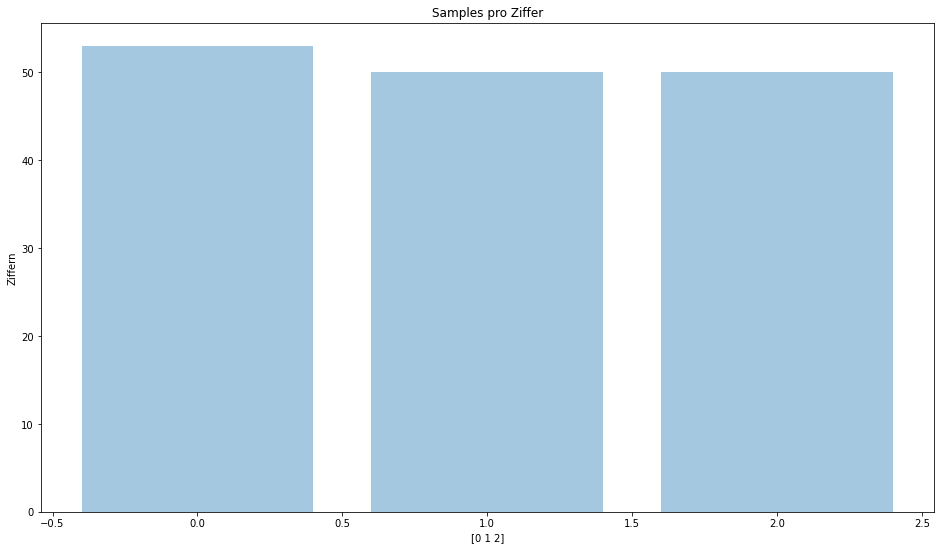

In [41]:
#
# Histogram of class distribution 
#
df = pd.DataFrame(iris_non,columns=['class'])
counts= df.groupby('class').size()
class_pos = np.arange(3)
plt.bar(class_pos, counts, align='center', alpha=0.4)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Samples pro Ziffer')
plt.show()

In [42]:
#
# Distribution of values in columns (features)
#
iris_non.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,153.000000,153.000000,153.000000,153.000000
mean,5.820915,3.056863,3.728947,1.169536
std,0.835137,0.429774,1.766264,0.763389
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Outliers in the data

In [ ]:
#
# Boxplots of features (outliers)
# Task: spot the outliers in the boxplots and describe the feature and the value range of the outliers (2 points)
#
iris_non.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Correlations between features

In [ ]:
#
# Distribution of values per feature
#
iris_non.hist()
plt.show()

In [ ]:
#
# Calculation of correlation facture between features
#
iris_non.corr()

In [ ]:
#
# Visual presentation of correlation between features
#
sns.heatmap(iris_non.corr(),annot=True,cmap='Blues_r')

In [ ]:
#
# Visualization as pair plot (scatter matrix)
#
scatter_matrix(iris_non)
plt.show()

In [ ]:
#
# Advanced pair plot (seaborn library) now including the class of each data point
# Task: what do you think? Which of the three classes are separable (2 points)
#
sns.pairplot(iris_non,hue='class')

In [ ]:
#
# Very advanced form of visualization of relations between features
#

In [ ]:
iris_data = iris_non.to_dict('records')
iris_data[:2]

In [ ]:
hip.Experiment.from_iterable(iris_data).display(force_full_width=True)

In [122]:
iris_x = iris_non.drop('class', 1)

<AxesSubplot:>

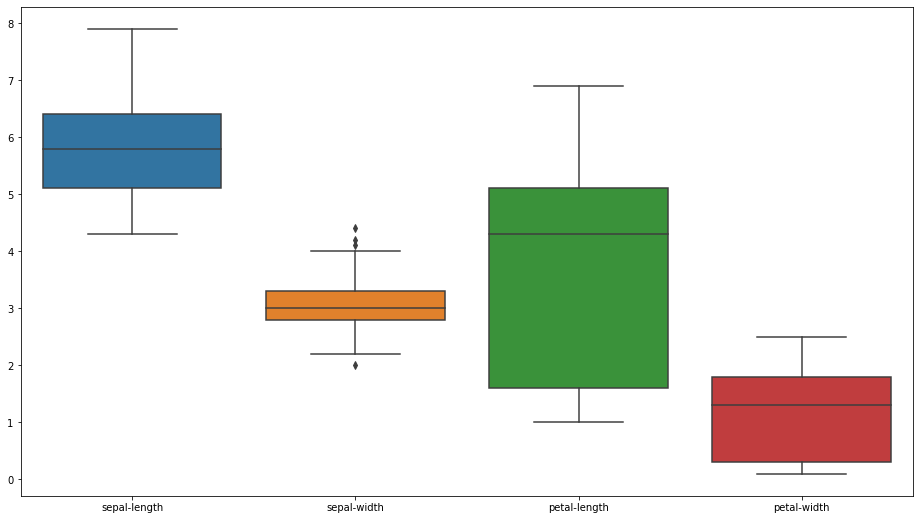

In [123]:
sns.boxplot(data=iris_x)

In [124]:
z = np.abs(stats.zscore(iris_x))
print(z > 3)


[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False  True False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 

In [135]:
outlierRows, outlierColumns = np.where(z>3)
print(outlierRows, outlierColumns)

[15] [1]


In [136]:
# drop all z-index outliers
iris_xwo = iris_x.drop(index=outlierRows)
#iris_xwo = iris_x[(z<3).all(axis=1)])

In [137]:
iris_xwo.iloc[np.arange(13,17)]

,sepal-length,sepal-width,petal-length,petal-width
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2
16,5.4,3.9,1.3,0.4
17,5.1,3.5,1.4,0.3
